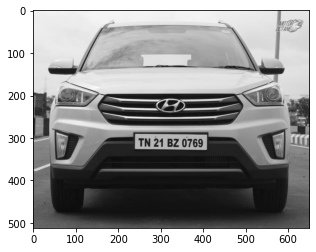

In [17]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt 
import imutils
car_img=cv.imread(r"C:\Users\nariv\Desktop\Project\DSC03565.jpg")
car_img_gray=cv.cvtColor(car_img,cv.COLOR_BGR2GRAY)
plt.imshow(cv.cvtColor(car_img_gray,cv.COLOR_BGR2RGB))

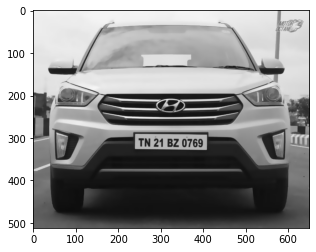

In [21]:
blateral_filter=cv.bilateralFilter(car_img_gray,11,15,15)
plt.imshow(cv.cvtColor(blateral_filter,cv.COLOR_BGR2RGB))

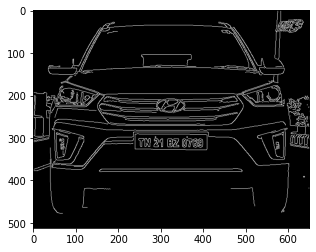

In [22]:
edge=cv.Canny(blateral_filter,30,200)
plt.imshow(cv.cvtColor(edge,cv.COLOR_BGR2RGB))

In [23]:
from matplotlib import contour


contours=cv.findContours(edge.copy(),cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)
contour_refind=imutils.grab_contours(contours)
contour_stored=sorted(contour_refind,key=cv.contourArea, reverse=True)[:10]

In [24]:
for contour in contour_stored:
    contour_approx=cv.approxPolyDP(contour,10,True)
    if len(contour_approx)==4:
        plate_location=contour_approx
        break

In [25]:
print(plate_location)

[[[239 291]]

 [[239 326]]

 [[408 326]]

 [[406 292]]]


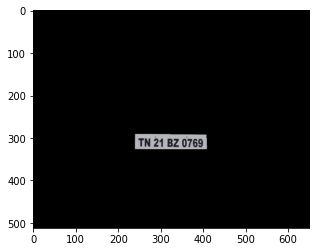

In [26]:
plate_mask0=np.zeros(car_img_gray.shape,np.uint8)
plate_mask=cv.drawContours(plate_mask0,[plate_location],0,255,-1)
plate_img=cv.bitwise_and(car_img,car_img,mask=plate_mask)
plt.imshow(cv.cvtColor(plate_img,cv.COLOR_BGR2RGB))